[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\srbuh\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package universal_tagset to
[nltk_data]     C:\Users\srbuh\AppData\Roaming\nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


-----Brown Corpus-----

 number of sentences: 57,340
 number of words: 1,161,192
 Tags Distribution: 1,161,192
Unique tags number: 472

 The most frequent 15 tags
Tag        count           percent   
NN         152470           13.13%
IN         120557           10.38%
AT         97959             8.44%
JJ         64028             5.51%
.          60638             5.22%
,          58156             5.01%
NNS        55110             4.75%
CC         37718             3.25%
RB         36464             3.14%
NP         34476             2.97%
VB         33693             2.90%
VBN        29186             2.51%
VBD        26167             2.25%
CS         22143             1.91%
PPS        18253             1.57%

Universal Tagset Analysis

Unique universal tags: 12
Tag        count           percent   
NOUN       275558           23.73%
VERB       182750           15.74%
.          147565           12.71%
ADP        144766           12.47%
DET        137019           11.80%
ADJ    

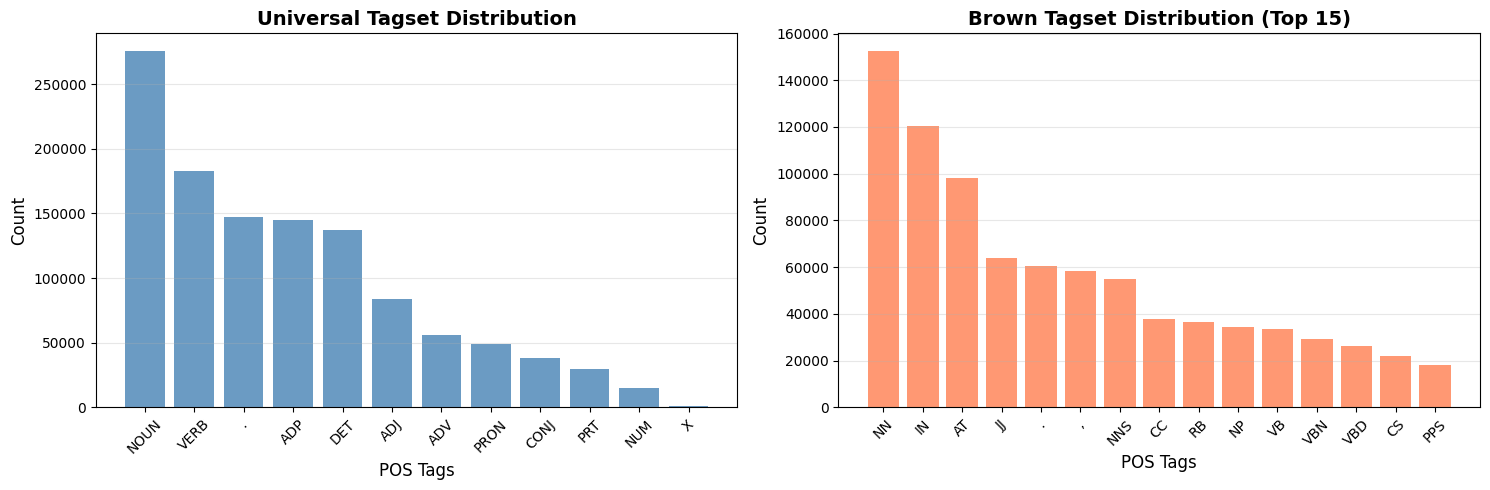

In [1]:
import nltk
from collections import Counter
import matplotlib.pyplot as plt
from nltk.corpus import brown
import nltk
nltk.download('brown')
nltk.download('universal_tagset')

# Data Preparation
print("-----Brown Corpus-----")

num_sentences = len(brown.sents())
print(f"\n number of sentences: {num_sentences:,}")

num_words = len(brown.words())
print(f" number of words: {num_words:,}")

# vocab(unique words)
vocabulary = set(word.lower() for word in brown.words())
vocab_size = len(vocabulary)

# tagged words
tagged_words = brown.tagged_words()

# tags distribution
print(f" Tags Distribution: {len(tagged_words):,}")

all_tags = [tag for word, tag in tagged_words]
tag_counts = Counter(all_tags)

print(f"Unique tags number: {len(tag_counts):,}")
print("\n The most frequent 15 tags")
print(f"{'Tag':<10} {'count':<15} {'percent':<10}")

for tag, count in tag_counts.most_common(15):
    percentage = (count / len(all_tags)) * 100
    print(f"{tag:<10} {count:<15} {percentage:>6.2f}%")

# Universal tagset analysis
print("\n" + "="*60)
print("Universal Tagset Analysis")
print("="*60)

universal_tagged = brown.tagged_words(tagset='universal')
universal_tags = [tag for word, tag in universal_tagged]
universal_tag_counts = Counter(universal_tags)

print(f"\nUnique universal tags: {len(universal_tag_counts)}")
print(f"{'Tag':<10} {'count':<15} {'percent':<10}")

for tag, count in universal_tag_counts.most_common():
    percentage = (count / len(universal_tags)) * 100
    print(f"{tag:<10} {count:<15} {percentage:>6.2f}%")

# Tagged sentence example
tagged_sents = brown.tagged_sents()

for i, sent in enumerate(tagged_sents[:3], 1):
    print(f"\n sentence {i}: ")
    print("-"*60)

    words_only = [word for word, tag in sent]
    print("text:", " ".join(words_only))

    print("\n Tagged: ")
    for word, tag in sent[:15]:
        print(f" {word:<20} -> {tag}")
    if len(sent) > 15:
        print(f"... {len(sent) - 15} more words")

# Visualization
print("\n" + "="*60)
print("Visualization")
print("="*60)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Universal tagset
tags_u = [tag for tag, count in universal_tag_counts.most_common()]
counts_u = [count for tag, count in universal_tag_counts.most_common()]

ax1.bar(tags_u, counts_u, color='steelblue', alpha=0.8)
ax1.set_xlabel('POS Tags', fontsize=12)
ax1.set_ylabel('Count', fontsize=12)
ax1.set_title('Universal Tagset Distribution', fontsize=14, fontweight='bold')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(axis='y', alpha=0.3)

# most frequently 15 Brown tags
tags_b = [tag for tag, count in tag_counts.most_common(15)]
counts_b = [count for tag, count in tag_counts.most_common(15)]

ax2.bar(tags_b, counts_b, color='coral', alpha=0.8)
ax2.set_xlabel('POS Tags', fontsize=12)
ax2.set_ylabel('Count', fontsize=12)
ax2.set_title('Brown Tagset Distribution (Top 15)', fontsize=14, fontweight='bold')
ax2.tick_params(axis='x', rotation=45)
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('brown_corpus_tags_distribution.png', dpi=300, bbox_inches='tight')
print("✅ Saved as 'brown_corpus_tags_distribution.png'")
plt.show()

In [2]:
# Data Splitting
import random
import numpy as np

random.seed(42)
np.random.seed(42)

tagged_sents = brown.tagged_sents()
print(f"Number of sentences tagged: {len(tagged_sents):,}")

shuffled_sents = list(tagged_sents)
random.shuffle(shuffled_sents)

total_sents = len(shuffled_sents)
train_end = int(0.8 * total_sents)
dev_end = int(0.9 * total_sents)   # or 0.1 for 10% ???

train_sents = shuffled_sents[:train_end]
dev_sents = shuffled_sents[train_end:dev_end]
test_sents = shuffled_sents[dev_end:]

print(f"Training set:    {len(train_sents):,} sentence ({len(train_sents)/total_sents*100:.1f}%)")
print(f"Development set: {len(dev_sents):,} sentence ({len(dev_sents)/total_sents*100:.1f}%)")
print(f"Test set:        {len(test_sents):,} sentence ({len(test_sents)/total_sents*100:.1f}%)")

Number of sentences tagged: 57,340
Training set:    45,872 sentence (80.0%)
Development set: 5,734 sentence (10.0%)
Test set:        5,734 sentence (10.0%)


In [3]:
# Cunts of words in each set
train_words = [word for sent in train_sents for word, tag in sent]
dev_words = [word for sent in dev_sents for word, tag in sent]
test_words = [word for sent in test_sents for word, tag in sent]

print(f"Training set:    {len(train_words):,} word")
print(f"Development set: {len(dev_words):,} word")
print(f"Test set:        {len(test_words):,} word")

# Vocabulary
train_vocab = set(word.lower() for word in train_words)
dev_vocab = set(word.lower() for word in dev_words)
test_vocab = set(word.lower() for word in test_words)

print(f"Training vocab:     {len(train_vocab):,} unique word")
print(f"Development vocab:  {len(dev_vocab):,} unique word")
print(f"Test vocab:         {len(test_vocab):,} unique word")

# Out-of-vocabulary (OOV)
dev_oov = dev_vocab - train_vocab
test_oov = test_vocab - train_vocab

print(f"Dev OOV:  {len(dev_oov):,} word ({len(dev_oov)/len(dev_vocab)*100:.2f}% of dev vocab)")
print(f"Test OOV: {len(test_oov):,} word ({len(test_oov)/len(test_vocab)*100:.2f}% of test vocab)")

# Exaples for each set
print("\n" + "="*60)
print("Examples for each SET")
print("="*60)

for dataset_name, dataset in [("TRAINING", train_sents[:2]),
                               ("DEVELOPMENT", dev_sents[:2]),
                               ("TEST", test_sents[:2])]:
    print(f"\n{dataset_name} SET:")
    for i, sent in enumerate(dataset, 1):
        words = [word for word, tag in sent]
        print(f"\n  sentence {i}: {' '.join(words[:10])}{'...' if len(words) > 10 else ''}")

# Tags distribution for each set
train_tags = [tag for sent in train_sents for word, tag in sent]
dev_tags = [tag for sent in dev_sents for word, tag in sent]
test_tags = [tag for sent in test_sents for word, tag in sent]

train_tag_counts = Counter(train_tags)
dev_tag_counts = Counter(dev_tags)
test_tag_counts = Counter(test_tags)

print("\n" + "="*60)
print("TAGs distribution for each SET")
print("="*60)

print(f"\n{'Tag':<10} {'Train %':<12} {'Dev %':<12} {'Test %':<12}")
print("-" * 60)

all_tags = set(train_tag_counts.keys()) | set(dev_tag_counts.keys()) | set(test_tag_counts.keys())
for tag in sorted(all_tags)[:15]:  # first 15
    train_pct = (train_tag_counts.get(tag, 0) / len(train_tags)) * 100
    dev_pct = (dev_tag_counts.get(tag, 0) / len(dev_tags)) * 100
    test_pct = (test_tag_counts.get(tag, 0) / len(test_tags)) * 100
    print(f"{tag:<10} {train_pct:>10.2f}% {dev_pct:>10.2f}% {test_pct:>10.2f}%")

Training set:    929,015 word
Development set: 116,350 word
Test set:        115,827 word
Training vocab:     45,153 unique word
Development vocab:  15,718 unique word
Test vocab:         15,603 unique word
Dev OOV:  2,461 word (15.66% of dev vocab)
Test OOV: 2,375 word (15.22% of test vocab)

Examples for each SET

TRAINING SET:

  sentence 1: He let her tell him all about the church .

  sentence 2: China never tried to integrate Tibet by extirpating the people's...

DEVELOPMENT SET:

  sentence 1: According to state law a slave had to be at...

  sentence 2: With tips , the girls average between $150 and $200...

TEST SET:

  sentence 1: Assumption 3 .

  sentence 2: Eileen got to dancing , just a little tiny dancing...

TAGs distribution for each SET

Tag        Train %      Dev %        Test %      
------------------------------------------------------------
'                0.03%       0.02%       0.03%
''               0.75%       0.80%       0.78%
(                0.19%       

✅ vizualization saved as 'data_splitting_analysis.png'


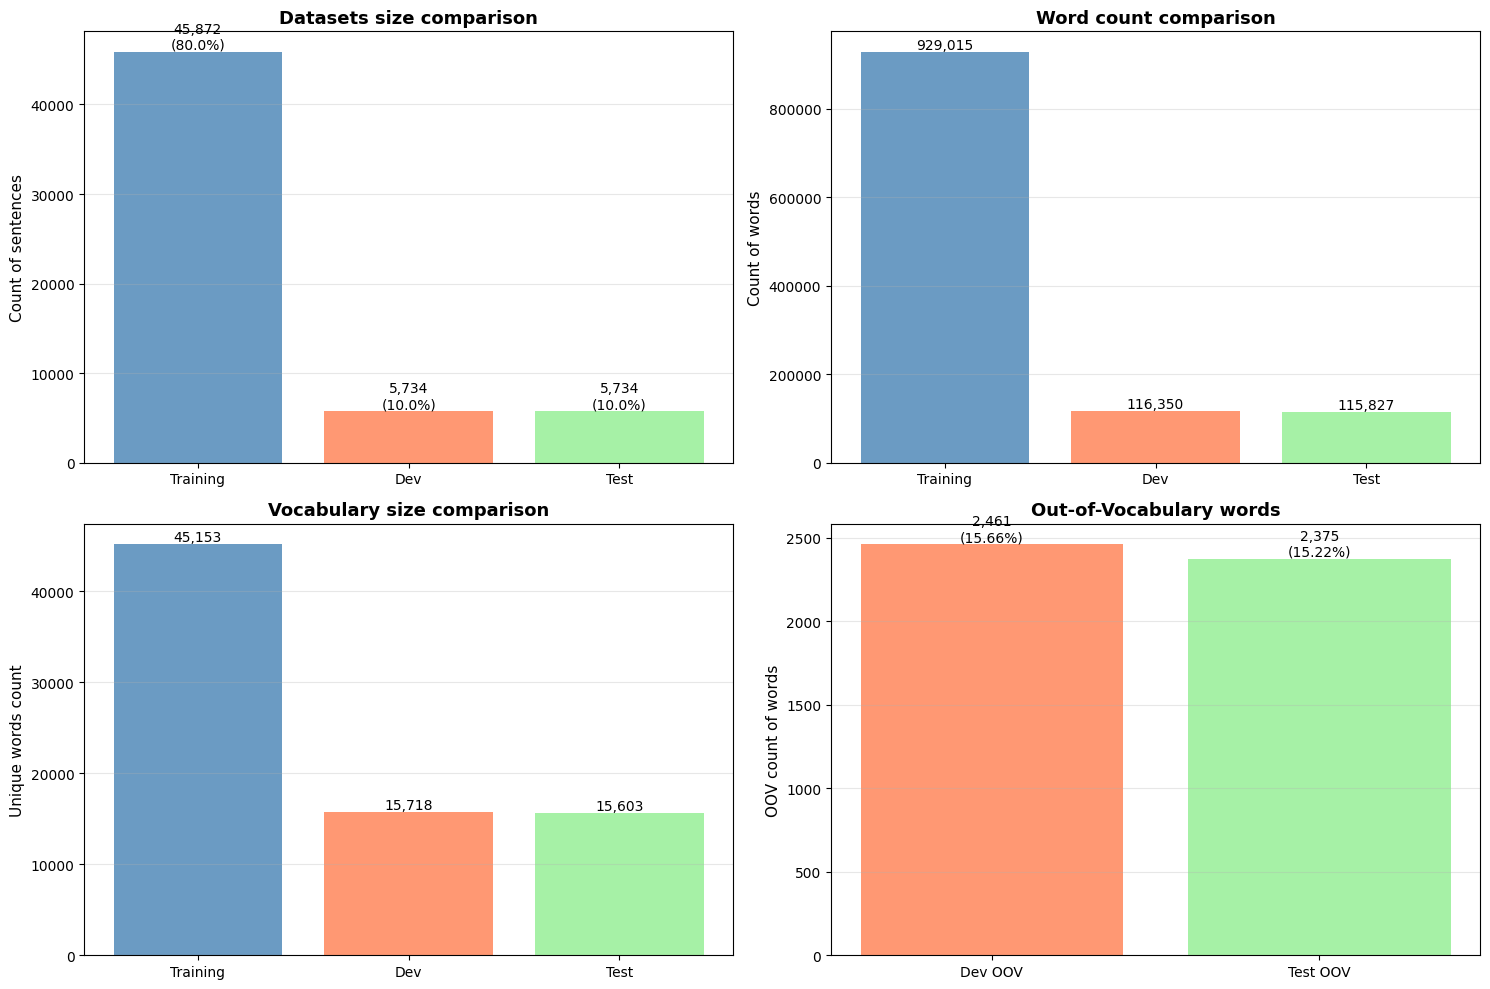

   train_sents: 45872 sentence
   dev_sents:   5734 sentence
   test_sents:  5734 sentence


In [4]:
# Vizualization
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

ax1 = axes[0, 0]
datasets = ['Training', 'Dev', 'Test']
sent_counts = [len(train_sents), len(dev_sents), len(test_sents)]
colors = ['steelblue', 'coral', 'lightgreen']

bars1 = ax1.bar(datasets, sent_counts, color=colors, alpha=0.8)
ax1.set_ylabel('Count of sentences', fontsize=11)
ax1.set_title('Datasets size comparison', fontsize=13, fontweight='bold')
ax1.grid(axis='y', alpha=0.3)

for bar, count in zip(bars1, sent_counts):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'{count:,}\n({count/total_sents*100:.1f}%)',
             ha='center', va='bottom', fontsize=10)

# 2. Count of words
ax2 = axes[0, 1]
word_counts = [len(train_words), len(dev_words), len(test_words)]

bars2 = ax2.bar(datasets, word_counts, color=colors, alpha=0.8)
ax2.set_ylabel('Count of words', fontsize=11)
ax2.set_title('Word count comparison', fontsize=13, fontweight='bold')
ax2.grid(axis='y', alpha=0.3)

for bar, count in zip(bars2, word_counts):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
             f'{count:,}',
             ha='center', va='bottom', fontsize=10)

# 3. Vocabulary
ax3 = axes[1, 0]
vocab_counts = [len(train_vocab), len(dev_vocab), len(test_vocab)]

bars3 = ax3.bar(datasets, vocab_counts, color=colors, alpha=0.8)
ax3.set_ylabel('Unique words count', fontsize=11)
ax3.set_title('Vocabulary size comparison', fontsize=13, fontweight='bold')
ax3.grid(axis='y', alpha=0.3)

for bar, count in zip(bars3, vocab_counts):
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height,
             f'{count:,}',
             ha='center', va='bottom', fontsize=10)

# 4. OOV
ax4 = axes[1, 1]
oov_data = ['Dev OOV', 'Test OOV']
oov_counts = [len(dev_oov), len(test_oov)]
oov_colors = ['coral', 'lightgreen']

bars4 = ax4.bar(oov_data, oov_counts, color=oov_colors, alpha=0.8)
ax4.set_ylabel('OOV count of words', fontsize=11)
ax4.set_title('Out-of-Vocabulary words', fontsize=13, fontweight='bold')
ax4.grid(axis='y', alpha=0.3)

for bar, count, vocab_size in zip(bars4, oov_counts, [len(dev_vocab), len(test_vocab)]):
    height = bar.get_height()
    pct = (count / vocab_size) * 100
    ax4.text(bar.get_x() + bar.get_width()/2., height,
             f'{count:,}\n({pct:.2f}%)',
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.savefig('data_splitting_analysis.png', dpi=300, bbox_inches='tight')
print("✅ vizualization saved as 'data_splitting_analysis.png'")
plt.show()

print(f"   train_sents: {len(train_sents)} sentence")
print(f"   dev_sents:   {len(dev_sents)} sentence")
print(f"   test_sents:  {len(test_sents)} sentence")

In [ ]:
import nltk
from collections import Counter, defaultdict
import numpy as np
from nltk.corpus import brown
import random

random.seed(42)
np.random.seed(42)

# ============================================================
# DATA PREPARATION
# ============================================================

print("Loading and splitting data...")
tagged_sents = list(brown.tagged_sents())
random.shuffle(tagged_sents)

train_end = int(0.8 * len(tagged_sents))
dev_end = int(0.9 * len(tagged_sents))

train_sents = tagged_sents[:train_end]
dev_sents = tagged_sents[train_end:dev_end]
test_sents = tagged_sents[dev_end:]

# Preprocessing - lowercase
train_sents = [[(w.lower(), t) for w, t in sent] for sent in train_sents]
dev_sents = [[(w.lower(), t) for w, t in sent] for sent in dev_sents]
test_sents = [[(w.lower(), t) for w, t in sent] for sent in test_sents]

# Create vocabularies
all_words = [w for sent in train_sents for w, t in sent]
all_tags = [t for sent in train_sents for w, t in sent]

word2idx = {'<UNK>': 0}
for w in set(all_words):
    if w not in word2idx:
        word2idx[w] = len(word2idx)

tag2idx = {'<START>': 0, '<END>': 1}
for t in set(all_tags):
    if t not in tag2idx:
        tag2idx[t] = len(tag2idx)

idx2tag = {v: k for k, v in tag2idx.items()}
vocab_size = len(word2idx)
num_tags = len(tag2idx)

print(f"Vocabulary size: {vocab_size}")
print(f"Number of tags: {num_tags}")
print(f"Train: {len(train_sents)}, Dev: {len(dev_sents)}, Test: {len(test_sents)}")

# ============================================================
# TRAINING - COUNT PROBABILITIES
# ============================================================

print("\n" + "="*60)
print("TRAINING HMM")
print("="*60)

transition_counts = defaultdict(lambda: defaultdict(int))
emission_counts = defaultdict(lambda: defaultdict(int))
tag_counts = defaultdict(int)

# Count occurrences
for sent in train_sents:
    prev_tag = '<START>'
    tag_counts['<START>'] += 1

    for word, tag in sent:
        transition_counts[prev_tag][tag] += 1
        emission_counts[tag][word] += 1
        tag_counts[tag] += 1
        prev_tag = tag

    transition_counts[prev_tag]['<END>'] += 1
    tag_counts['<END>'] += 1

print(f"✓ Counted transitions and emissions from {len(train_sents)} sentences")

# ============================================================
# PROBABILITY FUNCTIONS
# ============================================================

smoothing = 0.01

def get_transition_prob(prev_tag, curr_tag):
    """P(curr_tag | prev_tag) with Laplace smoothing"""
    numerator = transition_counts[prev_tag][curr_tag] + smoothing
    denominator = tag_counts[prev_tag] + smoothing * num_tags
    return np.log(numerator / denominator)

def get_emission_prob(tag, word):
    """P(word | tag) with Laplace smoothing"""
    numerator = emission_counts[tag][word] + smoothing
    denominator = tag_counts[tag] + smoothing * vocab_size
    return np.log(numerator / denominator)

# Show examples
print("\n" + "="*60)
print("PROBABILITY EXAMPLES")
print("="*60)

print("\nTransition Probabilities (log):")
print(f"P(NN | DT) = {get_transition_prob('DT', 'NN'):.4f}")
print(f"P(VB | TO) = {get_transition_prob('TO', 'VB'):.4f}")
print(f"P(JJ | DT) = {get_transition_prob('DT', 'JJ'):.4f}")

print("\nEmission Probabilities (log):")
print(f"P('the' | DT) = {get_emission_prob('DT', 'the'):.4f}")
print(f"P('dog' | NN) = {get_emission_prob('NN', 'dog'):.4f}")
print(f"P('run' | VB) = {get_emission_prob('VB', 'run'):.4f}")

# ============================================================
# VITERBI ALGORITHM
# ============================================================

def viterbi(sentence):
    """Viterbi algorithm for POS tagging"""
    n = len(sentence)

    # Initialize
    viterbi_matrix = np.full((n, num_tags), -np.inf)
    backpointer = np.zeros((n, num_tags), dtype=int)

    # First word
    word = sentence[0] if sentence[0] in word2idx else '<UNK>'
    for tag_idx, tag in idx2tag.items():
        if tag in ['<START>', '<END>']:
            continue
        trans_prob = get_transition_prob('<START>', tag)
        emit_prob = get_emission_prob(tag, word)
        viterbi_matrix[0, tag_idx] = trans_prob + emit_prob

    # Rest of the words
    for t in range(1, n):
        word = sentence[t] if sentence[t] in word2idx else '<UNK>'

        for curr_tag_idx, curr_tag in idx2tag.items():
            if curr_tag in ['<START>', '<END>']:
                continue

            max_prob = -np.inf
            max_prev = 0

            for prev_tag_idx, prev_tag in idx2tag.items():
                if prev_tag in ['<START>', '<END>']:
                    continue

                trans_prob = get_transition_prob(prev_tag, curr_tag)
                prob = viterbi_matrix[t-1, prev_tag_idx] + trans_prob

                if prob > max_prob:
                    max_prob = prob
                    max_prev = prev_tag_idx

            emit_prob = get_emission_prob(curr_tag, word)
            viterbi_matrix[t, curr_tag_idx] = max_prob + emit_prob
            backpointer[t, curr_tag_idx] = max_prev

    # Find best final tag
    best_last_tag = -1
    max_prob = -np.inf
    for tag_idx, tag in idx2tag.items():
        if tag in ['<START>', '<END>']:
            continue
        prob = viterbi_matrix[n-1, tag_idx] + get_transition_prob(tag, '<END>')
        if prob > max_prob:
            max_prob = prob
            best_last_tag = tag_idx

    # Backtrack
    best_path = [best_last_tag]
    for t in range(n-1, 0, -1):
        best_path.insert(0, backpointer[t, best_path[0]])

    return [idx2tag[idx] for idx in best_path]

# ============================================================
# TESTING
# ============================================================

print("\n" + "="*60)
print("PREDICTION EXAMPLES")
print("="*60)

test_sentences = [
    "the dog runs quickly".split(),
    "she will go to school".split(),
    "a big red car".split()
]

for sent in test_sentences:
    pred_tags = viterbi(sent)
    print(f"\nSentence: {' '.join(sent)}")
    print(f"Tags:     {' '.join(pred_tags)}")

# ============================================================
# EVALUATION
# ============================================================

def evaluate(sentences):
    """Evaluate accuracy"""
    correct = 0
    total = 0

    for sent in sentences:
        words = [w for w, t in sent]
        true_tags = [t for w, t in sent]
        pred_tags = viterbi(words)

        for true, pred in zip(true_tags, pred_tags):
            if true == pred:
                correct += 1
            total += 1

    return correct / total if total > 0 else 0

print("\n" + "="*60)
print("EVALUATION")
print("="*60)

print("\nEvaluating (this may take a moment)...")
train_acc = evaluate(train_sents[:1000])
dev_acc = evaluate(dev_sents[:500])
test_acc = evaluate(test_sents[:500])

print(f"\nTraining accuracy (1000 sent): {train_acc*100:.2f}%")
print(f"Dev accuracy (500 sent):       {dev_acc*100:.2f}%")
print(f"Test accuracy (500 sent):      {test_acc*100:.2f}%")

print("\n" + "="*60)
print("HMM COMPLETE ✓")
print("="*60)

Loading and splitting data...
Vocabulary size: 45154
Number of tags: 452
Train: 45872, Dev: 5734, Test: 5734

TRAINING HMM
✓ Counted transitions and emissions from 45872 sentences

PROBABILITY EXAMPLES

Transition Probabilities (log):
P(NN | DT) = -0.7156
P(VB | TO) = -0.1939
P(JJ | DT) = -2.4745

Emission Probabilities (log):
P('the' | DT) = -13.5515
P('dog' | NN) = -7.8032
P('run' | VB) = -5.6506

PREDICTION EXAMPLES

Sentence: the dog runs quickly
Tags:     AT NN NNS .

Sentence: she will go to school
Tags:     PPS MD VB IN NN

Sentence: a big red car
Tags:     AT JJ JJ NN

EVALUATION

Evaluating (this may take a moment)...
